In [1]:
!pip install scikit-learn pandas joblib
#Import essential libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import joblib


In [3]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/arpitbytes507/Employee-Salary-Prediction/refs/heads/main/Salary%20Data.csv"
data = pd.read_csv(url)

# Clean column names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()

# Check for missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

# Drop rows where Salary (target) is missing
data = data.dropna(subset=['Salary'])

# Fill missing numerical values with mean
num_cols = ['Age', 'Years of Experience']
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing categorical values with mode
cat_cols = ['Gender', 'Education Level', 'Job Title']
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Confirm cleanup
print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Display first few rows
data.head()


Missing values before cleaning:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

Missing values after cleaning:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


C:\Users\arpit\AppData\Local\Temp\ipykernel_13672\2659004278.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\arpit\AppData\Local\Temp\ipykernel_13672\2659004278.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
# Features and Target
X = data.drop('Salary', axis=1)  # All columns except Salary
y = data['Salary']               # Target column

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Education Level', 'Job Title']
numerical_cols = ['Age', 'Years of Experience']

# Create column transformer to handle encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])


In [5]:
# Split data into train and test sets
X_train,X_test,y_train,y_test =train_test_split(
    X, y,test_size=0.2,random_state=42)


In [6]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(n_estimators=100,random_state=42))
])
#Train the model
rf_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


🎯 Random Forest Model Evaluation:
Mean Squared Error: 315878566.67
R² Score: 0.87


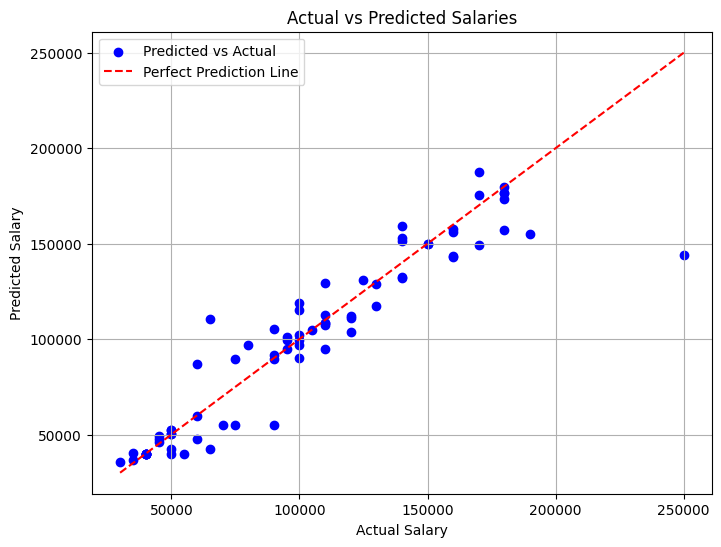

In [7]:
# Predict on test set
y_pred = rf_pipeline.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🎯 Random Forest Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 📊 Plot Actual vs Predicted Salaries
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Save trained model
joblib.dump(rf_pipeline, 'salary_model.pkl')
print("✅ Model trained and saved as salary_model.pkl")

✅ Model trained and saved as salary_model.pkl
